In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 신호 시각화

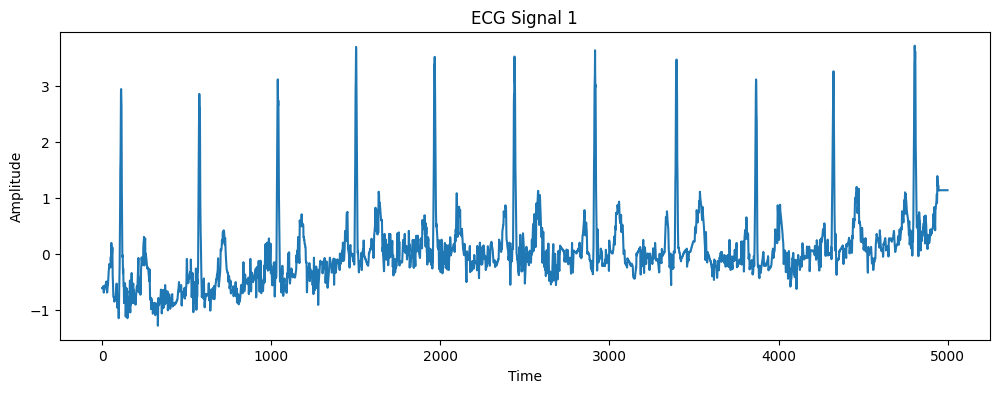

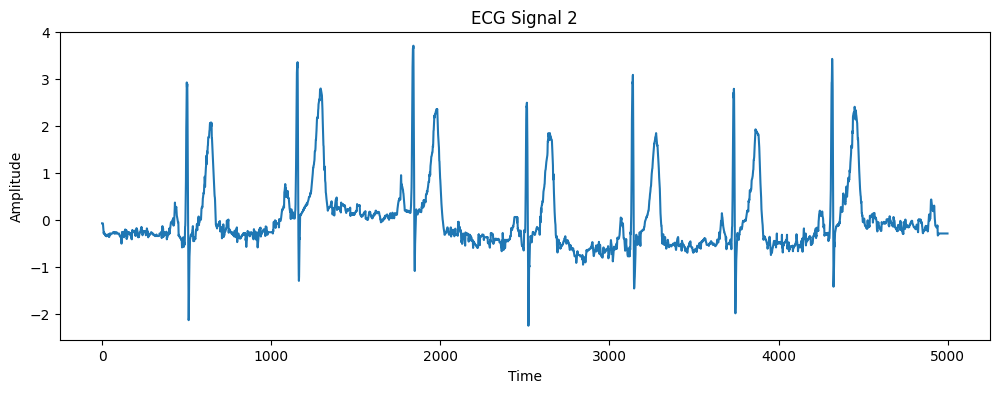

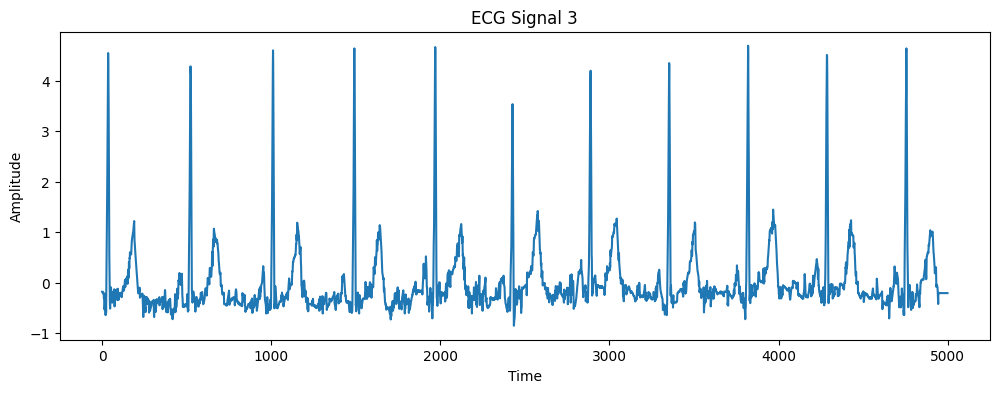

In [72]:
# custom_file 폴더에서 lead1_signals 데이터 로드
lead1_signals = np.load('./custom_file/annie_ptb_xl_lead1.npy')

# 데이터 정규화
lead1_signals_normalized = (lead1_signals - lead1_signals.mean()) / (lead1_signals.std()+1e-7)

# 개별 신호 시각화
def plot_ecg_signal(signal, title="ECG Signal"):
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# 몇 개의 신호 시각화
for i in range(3):
    plot_ecg_signal(lead1_signals_normalized[i], title=f"ECG Signal {i+1}")


In [73]:
lead1_signals.mean()

-0.0015642019

In [74]:
lead1_signals.std()

0.18565995

# 이상치 확인

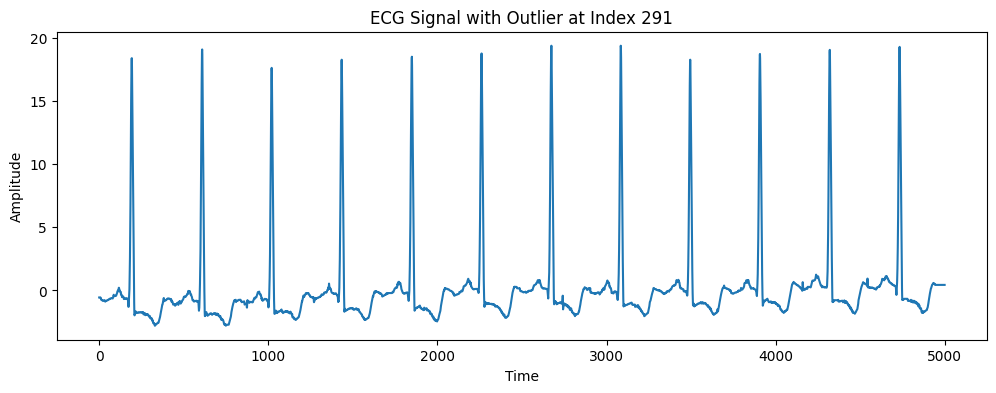

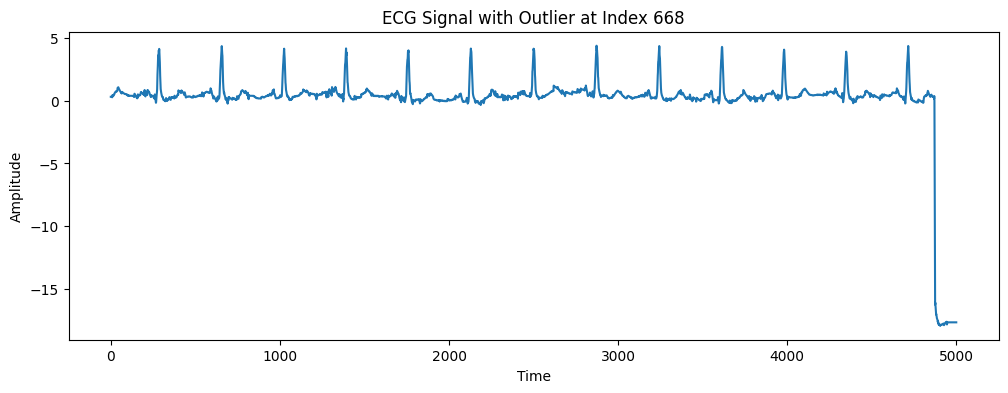

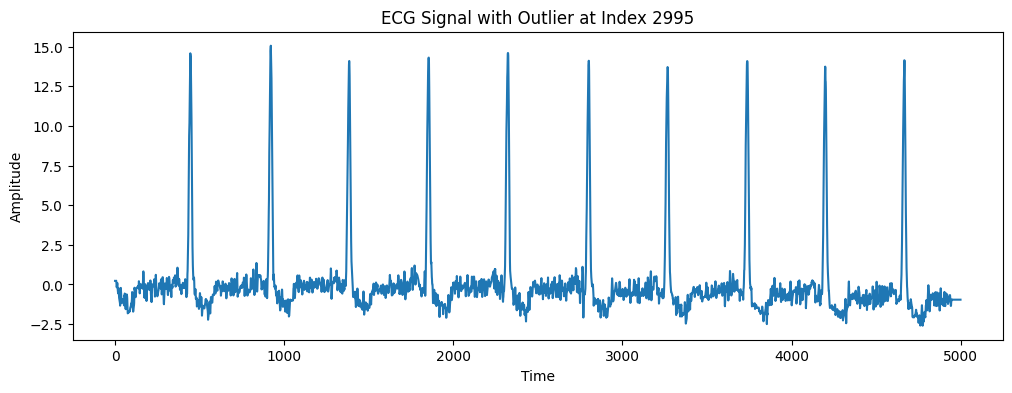

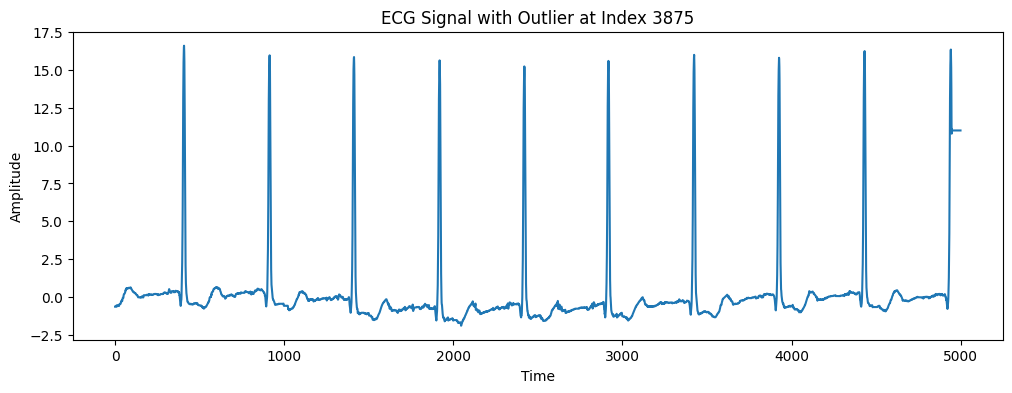

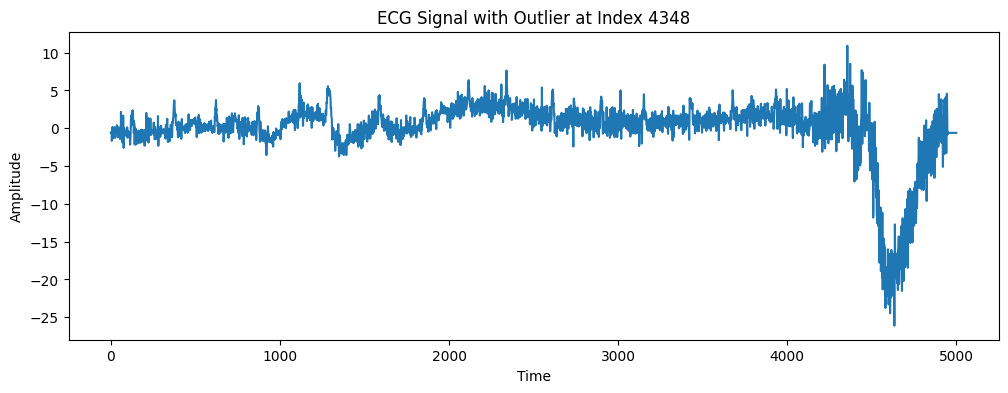

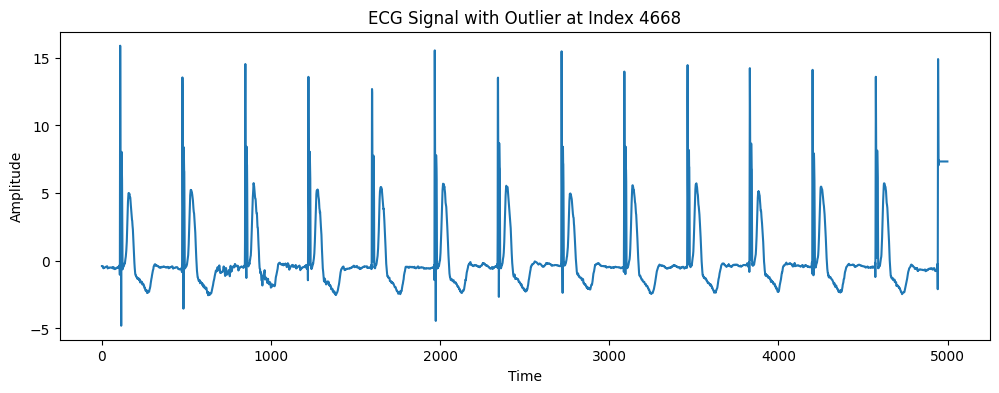

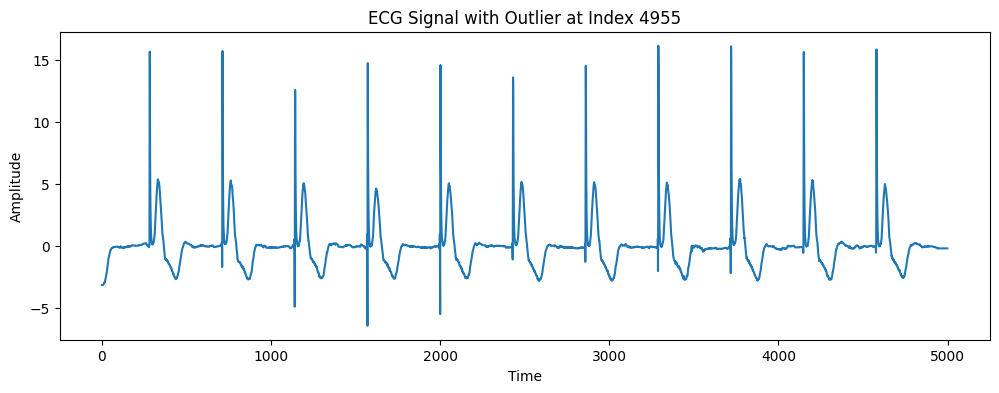

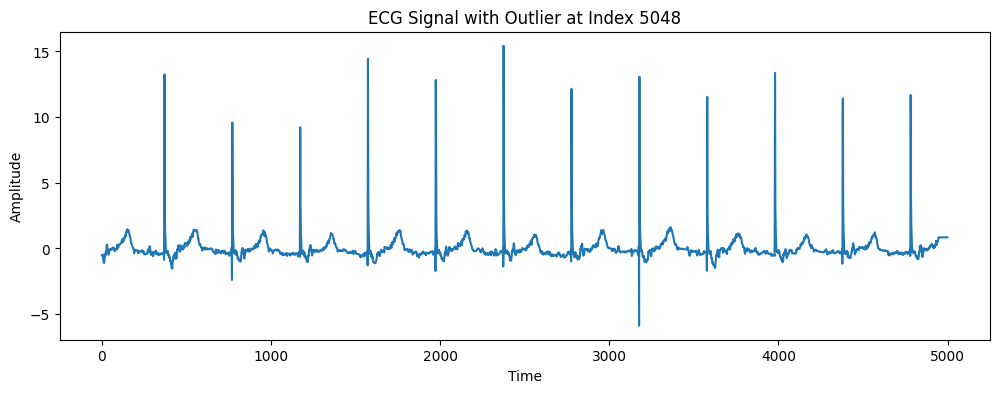

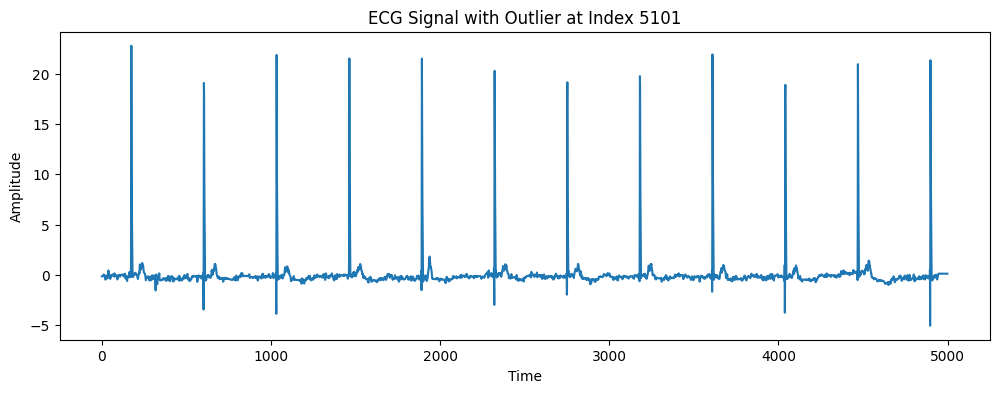

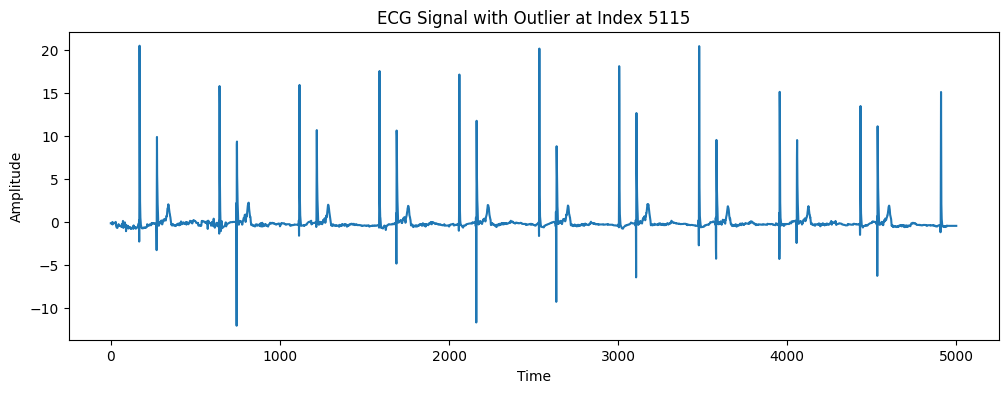

In [70]:
# 이상치 기준 설정
lower_threshold = -15
upper_threshold = 15

# 이상치를 포함하는 행의 인덱스를 찾습니다.
outlier_indices = np.where(
    (lead1_signals_normalized < lower_threshold) | 
    (lead1_signals_normalized > upper_threshold)
)[0]

# 중복된 인덱스를 제거하고, 유니크한 행 인덱스만 가져옵니다.
unique_outlier_indices = np.unique(outlier_indices)

# 신호 시각화 함수 정의
def plot_ecg_signal(signal, title="ECG Signal"):
    plt.figure(figsize=(12, 4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# 각 이상치 행에 대해 심전도 그래프를 그립니다.
for i, index in enumerate(unique_outlier_indices):
    if i >= 10:  # 최대 10개의 이상치 그래프만 그립니다.
        break
    plot_ecg_signal(lead1_signals_normalized[index], title=f"ECG Signal with Outlier at Index {index}")


In [71]:
unique_outlier_indices.size

112